Test Cell

In [10]:
print("Hello world!")

Hello world!


Let's download the dataset

In [11]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

#initialize the Kaggle API
api = KaggleApi()
api.authenticate()

#define the dataset path on Kaggle
dataset_path = 'rishikeshkonapure/hr-analytics-prediction'

#define the path to download the dataset
destination_path = 'C:/Users/JB/cmps490/ml'

#download dataset
api.dataset_download_files(dataset_path, path=destination_path, unzip=True)

print(f"Dataset downloaded to: {destination_path}")

Dataset downloaded to: C:/Users/JB/cmps490/ml


# 0. Take a preliminary glean at the dataset
Is this a dataset we want to work with?

##### Legend
- 📝: To do
- ⭐: Finding

In [49]:
import pandas as pd

hr = pd.read_csv('C:\\Users\\JB\\cmps490\\ml\\HR-Employee-Attrition.csv')
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [50]:
hr.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [51]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [52]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

What objects need to be converted possibly?

In [53]:
#filter columns of dtype 'object'
object_columns = hr.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Value counts for {column}:")
    print(hr[column].value_counts())
    print("\n")

Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


Value counts for EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Value counts for Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64


Value counts for JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director        

# 1. Preliminary manipulations and an overall look at the dataset

We don't need the Over18 column since all values are true there

In [54]:
hr = hr.drop("Over18", axis=1)

Copy the data and make all columns numerical

In [143]:
hr_num = hr.copy()

#label encoding for binary columns
label_columns = ['Attrition', 'OverTime']
for col in label_columns:
    hr_num[col] = hr_num[col].map({'Yes': 1, 'No': 0})

#for Gender
hr_num['Gender'] = hr_num['Gender'].map({'Male': 0, 'Female': 1})

#one-hot encoding for columns with more than two categories
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
hr_num = pd.get_dummies(hr_num, columns=one_hot_columns)



Let's make a copy with just Attrition converted to numeric data.

In [173]:
hr_attrition_num = hr.copy()
hr_attrition_num['Attrition'] = hr_attrition_num['Attrition'].map({'No': 0, 'Yes': 1})

Correlation matrix and heatmap for all numeric variables in the set

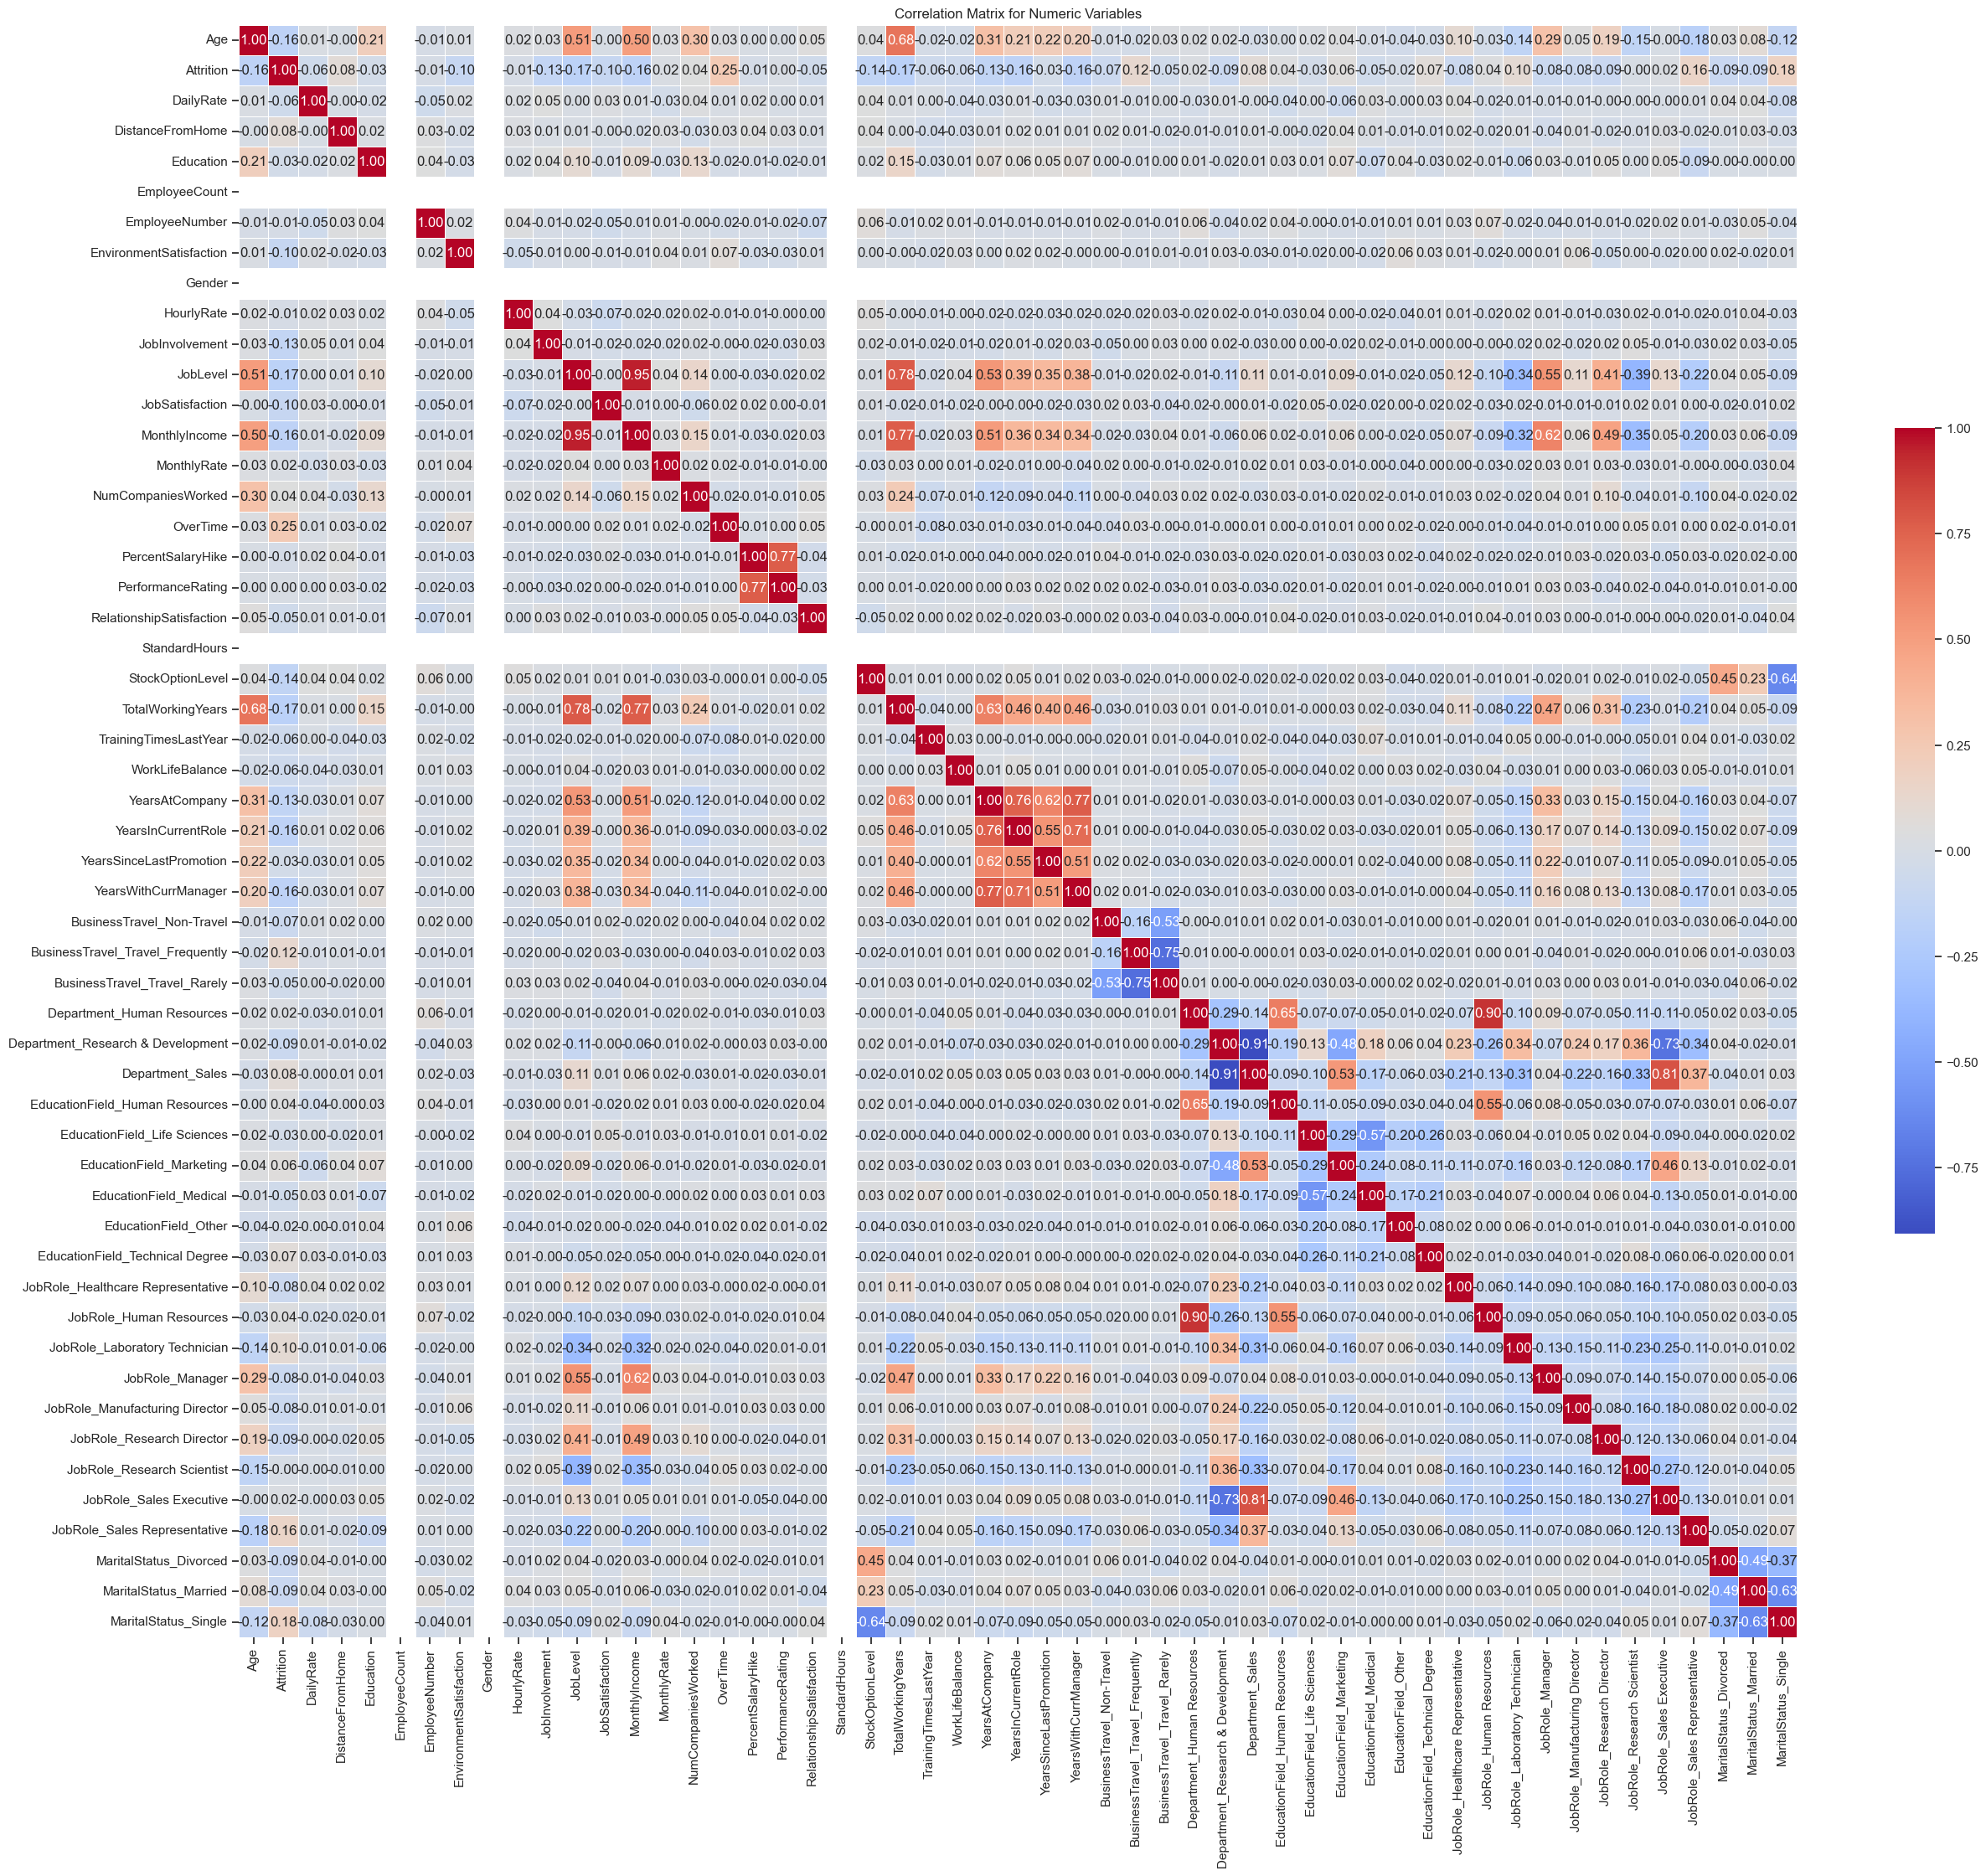

In [57]:
import seaborn as sb
import matplotlib.pyplot as plt

#calculate the correlation matrix
corr_matrix = hr_num.corr()

#plot the heatmap
plt.figure(figsize=(30, 25))  
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Correlation Matrix for Numeric Variables')
plt.show()

What pairs have the highest correlation?

In [146]:
import numpy as np

n = 0.37 

#filter out the upper triangle and diagonal of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

#pairs where correlation is above the threshold
high_corr_pairs = corr_matrix.where(mask).stack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > n]

print(high_corr_pairs.sort_values(by='Correlation', ascending=False))

                           Variable1                       Variable2  \
406                         JobLevel                   MonthlyIncome   
1024      Department_Human Resources         JobRole_Human Resources   
1067                Department_Sales         JobRole_Sales Executive   
414                         JobLevel               TotalWorkingYears   
630                PercentSalaryHike               PerformanceRating   
491                    MonthlyIncome               TotalWorkingYears   
849                   YearsAtCompany            YearsWithCurrManager   
847                   YearsAtCompany              YearsInCurrentRole   
875               YearsInCurrentRole            YearsWithCurrManager   
18                               Age               TotalWorkingYears   
1017      Department_Human Resources  EducationField_Human Resources   
762                TotalWorkingYears                  YearsAtCompany   
513                    MonthlyIncome                 JobRole_Man

Plot a histogram for each numerical attribute to get a feel for the data

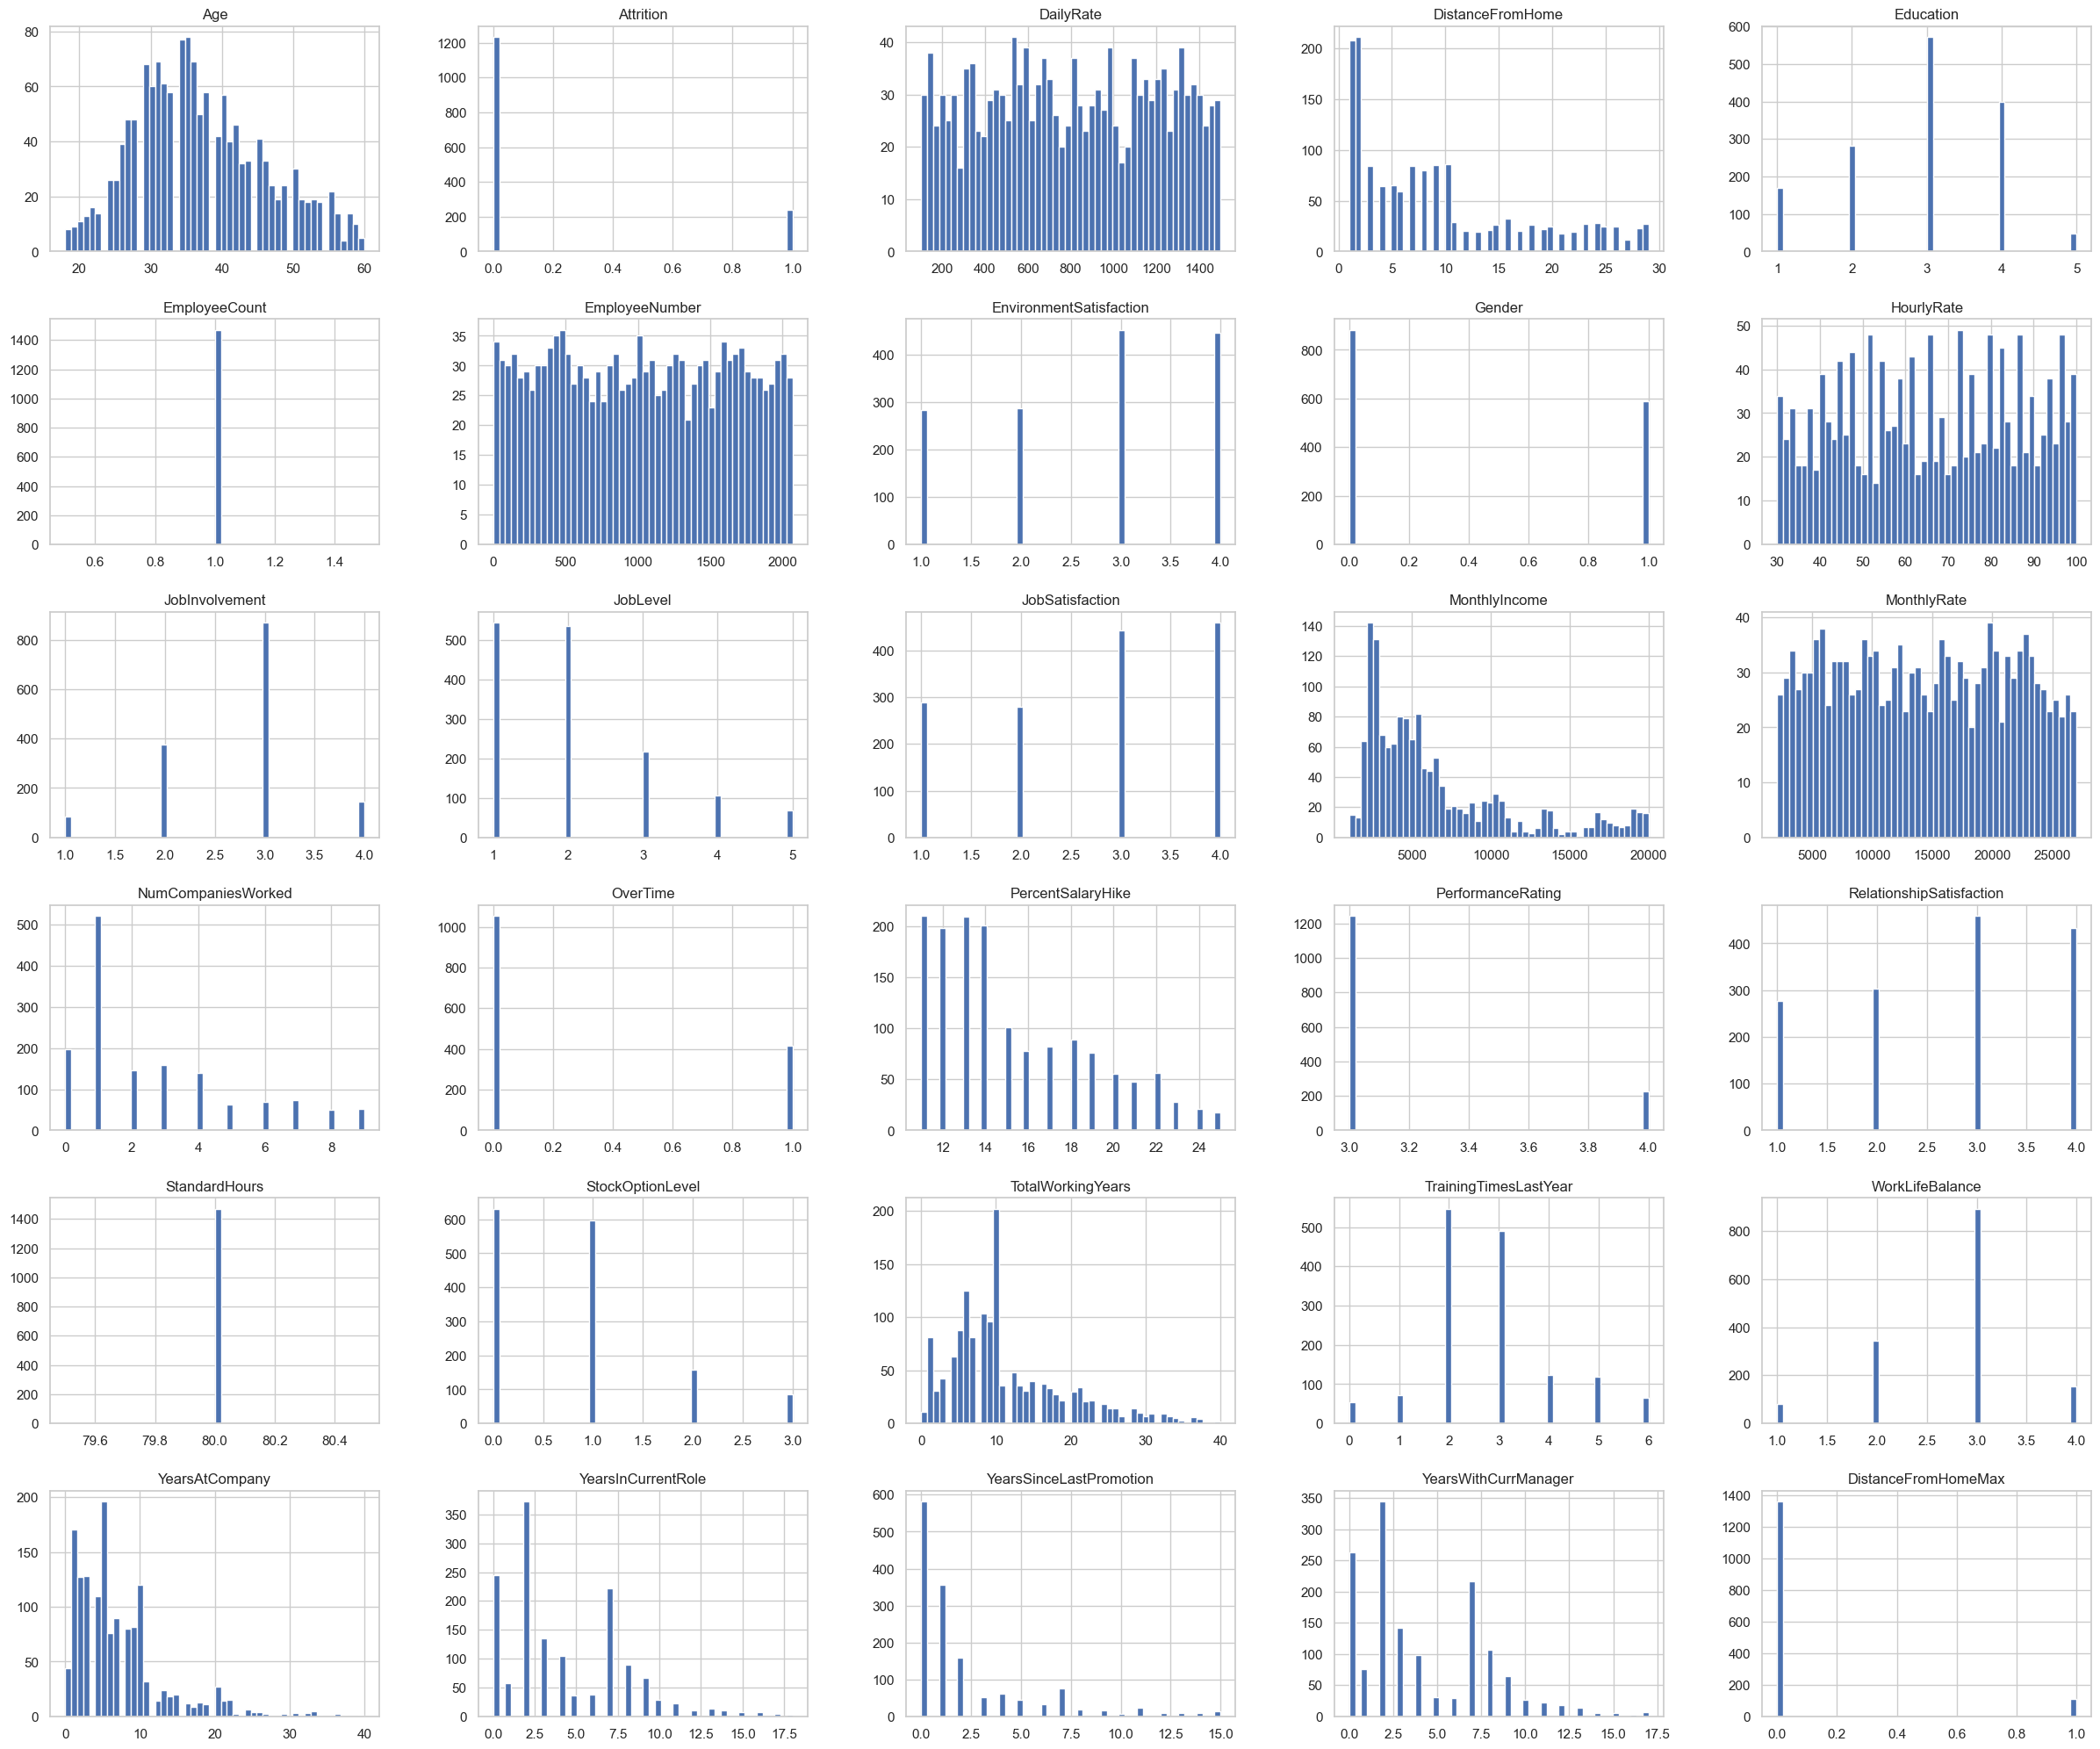

In [147]:
#plot a histogram for each numerical attribute. 
#A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 
hr_num.hist(bins=50, figsize=(30,25))
plt.show()

# 2. Comparing DistanceFromHome and Attrition  
Does DistanceFromHome have an impact on Attrition?

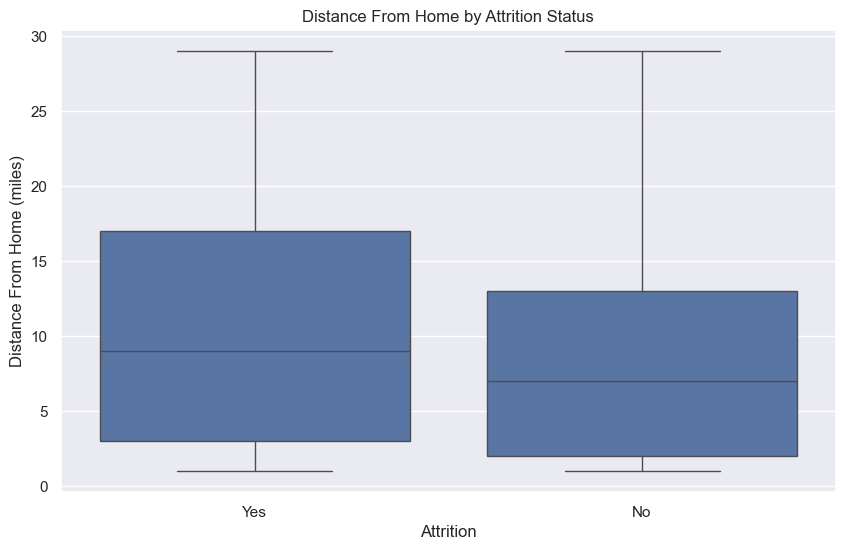

In [148]:
#set style of plot
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6)) 
sb.boxplot(x='Attrition', y='DistanceFromHome', data=hr)

plt.title('Distance From Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home (miles)')
plt.show()

#### What percent of people leave from each distance category?

In [149]:
hr_num['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

In [150]:
max_distance = hr['DistanceFromHome'].max()

#define distance categories
bins = [0, 5, 10, 15, 20, 25, max(hr_num['DistanceFromHome'])+1]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', f'Max: 25-{max_distance}']
hr_num['DistanceCategory'] = pd.cut(hr_num['DistanceFromHome'], bins=bins, labels=labels, right=False)

#calculate attrition rate by distance category
attrition_rate_by_distance = hr_num.groupby('DistanceCategory', observed=False)['Attrition'].mean()

print(attrition_rate_by_distance)


DistanceCategory
0-5           0.135802
6-10          0.150134
11-15         0.177143
16-20         0.190476
21-25         0.256410
Max: 25-29    0.169643
Name: Attrition, dtype: float64


The percentages of attrition seem to increase as distance grows with the exception of the max category. Why?

📝Explore what's going on with Max range

Create a new column that indicates if this person is in the max range (25 - 29) in DistanceFromHome and then look at a heatmap to see what other factors contributing to the max range being lowest

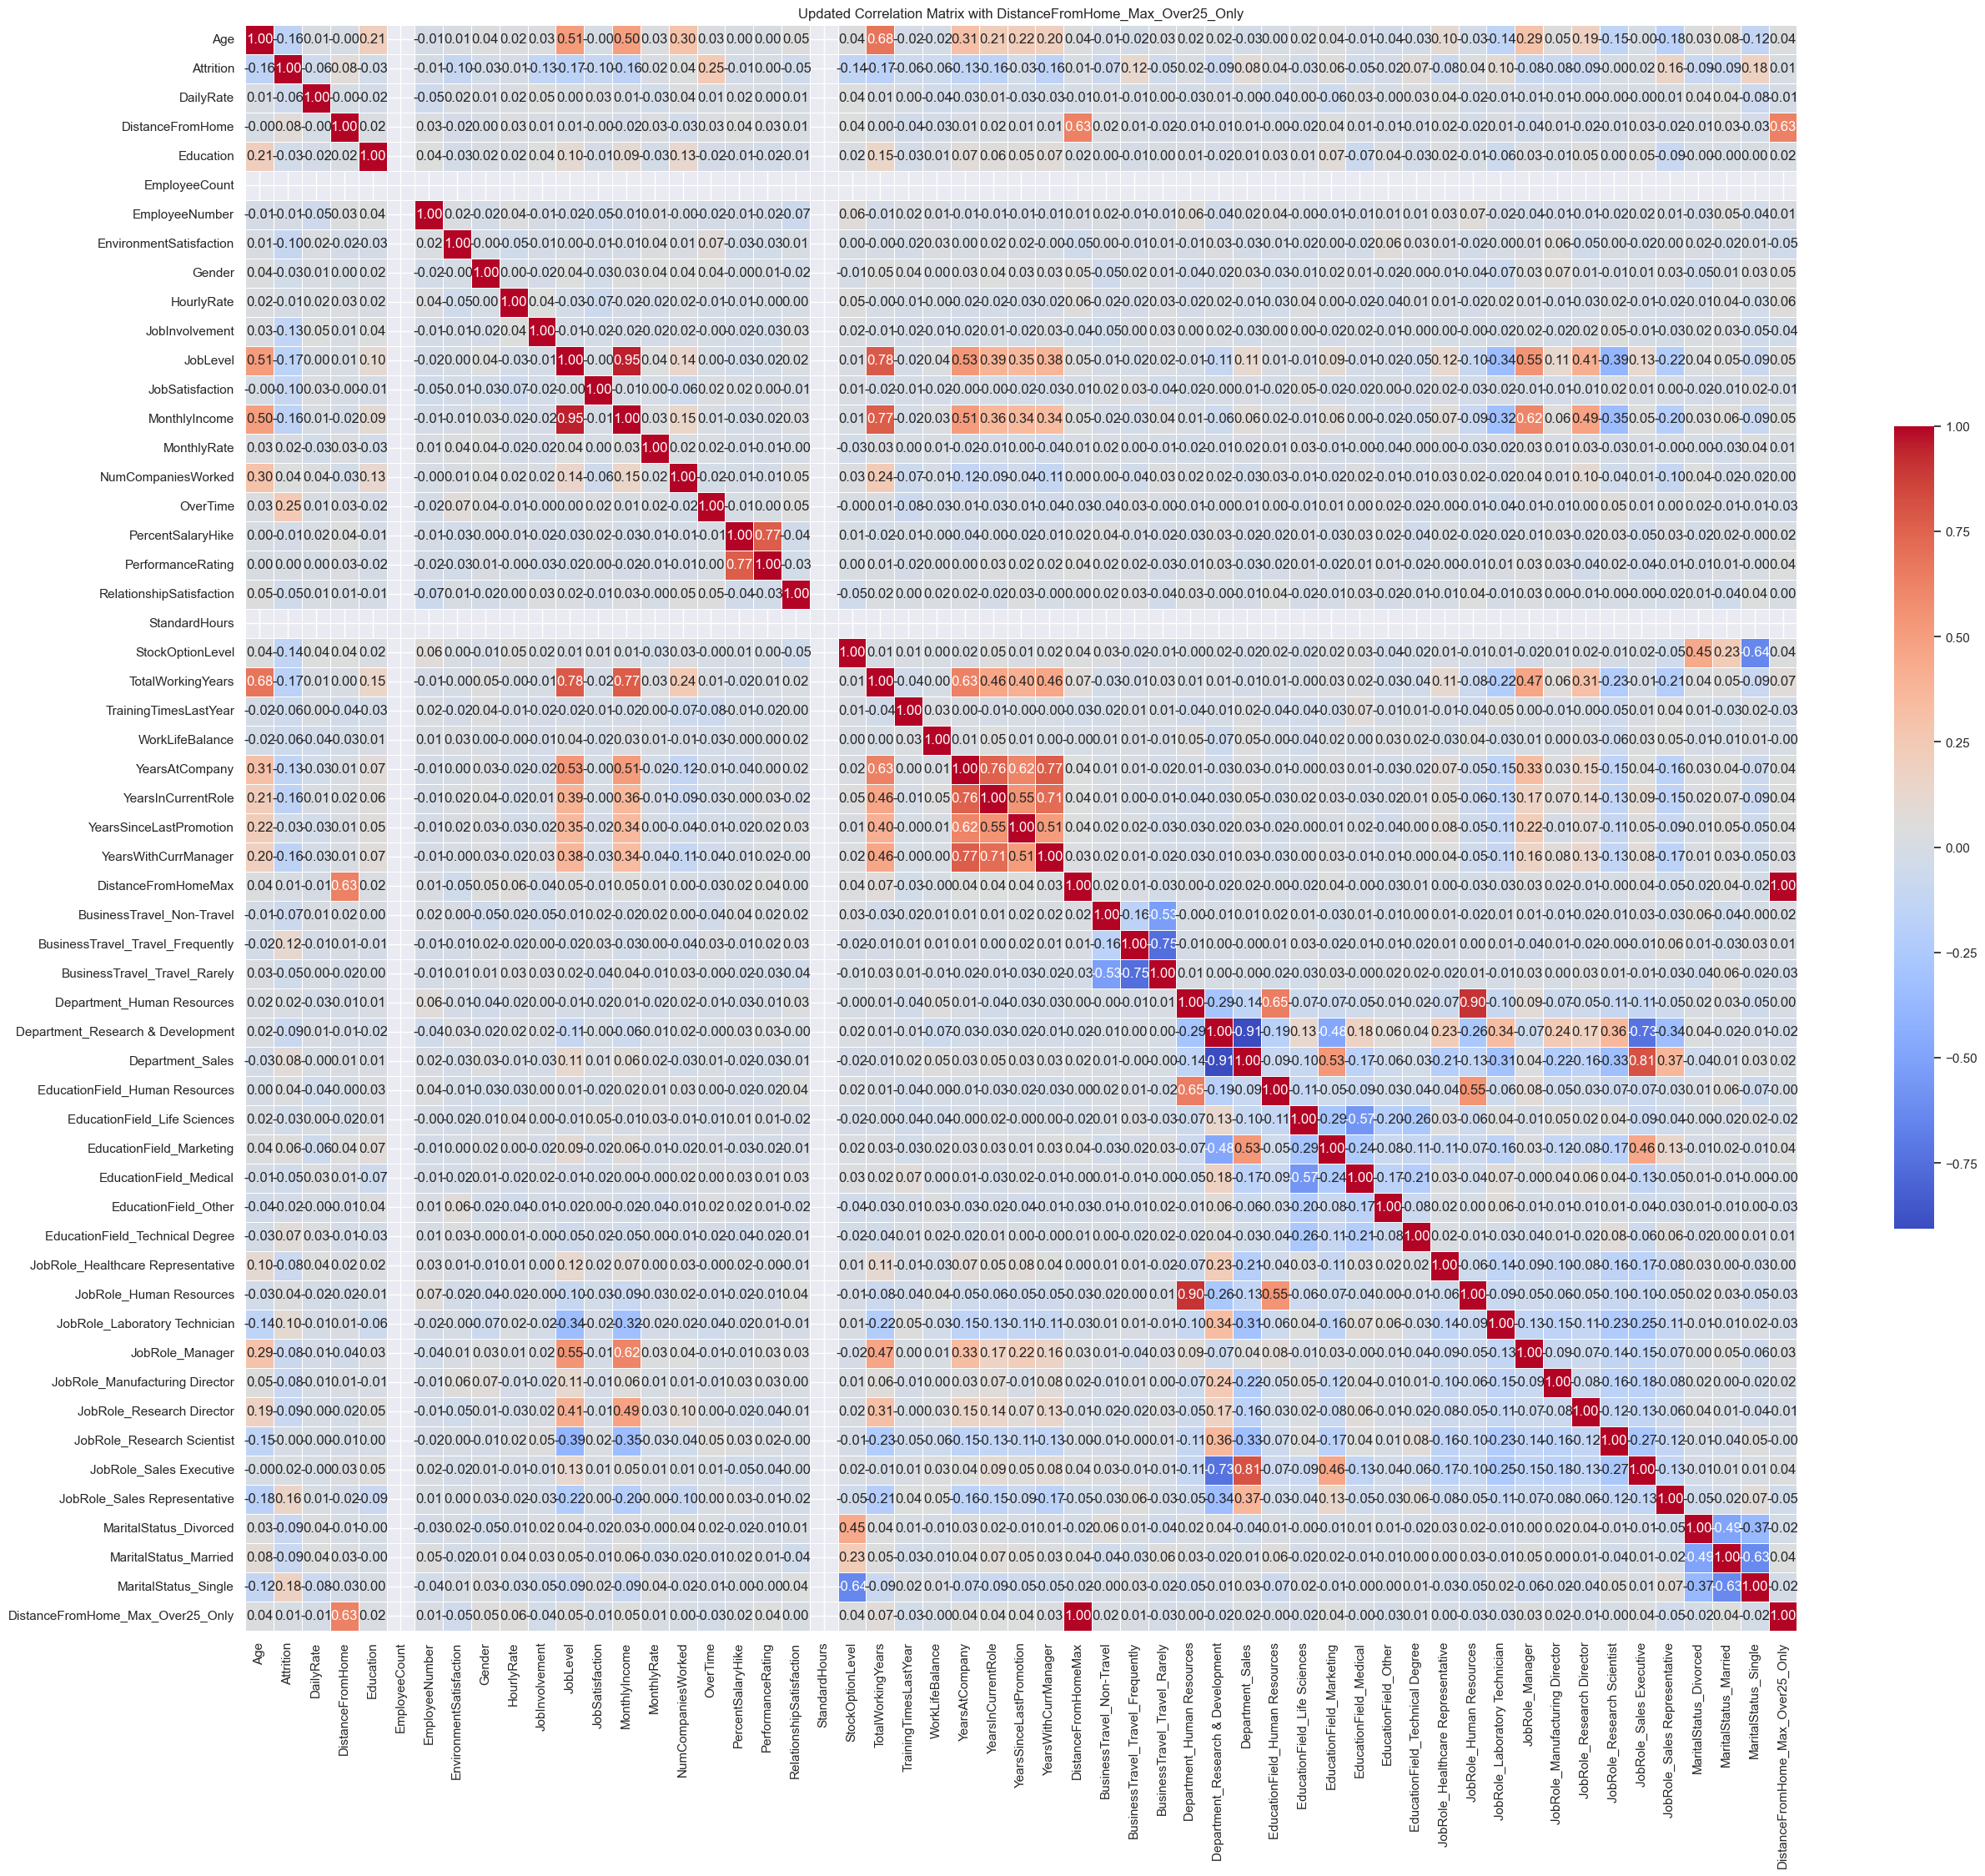

In [156]:
#Dropping categorical 'IncomeBin' and 'DistanceCategory' columns
hr_num = hr_num.drop(['IncomeBin', 'DistanceCategory'], axis=1) #comment this out later as it will cause an issue?

#create a new column 'DistanceFromHomeMax' for the 25-29 miles range
#hr_num['DistanceFromHomeMax'] = hr_num['DistanceFromHome'].apply(lambda x: 1 if 25 <= x <= 29 else 0)
hr_num['DistanceFromHome_Max_Over25_Only'] = ((hr_num['DistanceFromHome'] >= 25) & (hr_num['DistanceFromHome'] <= 29)).astype(int)
#calculate the new correlation matrix
corr_matrix_max_distance = hr_num.corr()
#plot the heatmap
plt.figure(figsize=(30, 25)) 
sb.heatmap(corr_matrix_max_distance, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Updated Correlation Matrix with DistanceFromHome_Max_Over25_Only')
plt.show()

In [157]:
#in case we need to check again later. Will delete some time
for col in hr_num.columns:
    if hr_num[col].dtype not in ['int64', 'float64', 'bool']:
        print(f"Column '{col}' data type: {hr_num[col].dtype}")


Column 'DistanceFromHome_Max_Over25_Only' data type: int32


What columns have the highest correlation to DistanceFromHome_Max_Over25_Only?

In [141]:
n = 0.034  # Threshold for correlation

# Assuming corr_matrix_max_distance is your calculated correlation matrix
# Filter out correlations related to 'DistanceFromHome_Max_Over25_Only' and above the threshold
corr_with_distance = corr_matrix_max_distance['DistanceFromHome_Max_Over25_Only'].drop('DistanceFromHome_Max_Over25_Only')
high_corr_vars = corr_with_distance[abs(corr_with_distance) >= n].reset_index()
high_corr_vars.columns = ['Variable', 'Correlation']

# Print the variables with correlation above the threshold with 'DistanceFromHome_Max_Over25_Only'
print(high_corr_vars.sort_values(by='Correlation', ascending=False))

                        Variable  Correlation
1               DistanceFromHome     0.631672
9              TotalWorkingYears     0.069125
3                     HourlyRate     0.055414
5                       JobLevel     0.052921
6                  MonthlyIncome     0.046453
12       YearsSinceLastPromotion     0.042960
10                YearsAtCompany     0.042322
7              PerformanceRating     0.041095
11            YearsInCurrentRole     0.040583
13      EducationField_Marketing     0.040335
16         MaritalStatus_Married     0.039751
0                            Age     0.038616
14       JobRole_Sales Executive     0.038032
8               StockOptionLevel     0.036382
4                 JobInvolvement    -0.035155
2        EnvironmentSatisfaction    -0.046552
15  JobRole_Sales Representative    -0.048034


Let's look at this visually

C:\Users\JB\AppData\Local\Temp\ipykernel_22808\1416741397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Correlation', y='Variable', data=high_corr_vars.sort_values(by='Correlation', key=abs, ascending=False), palette="vlag")


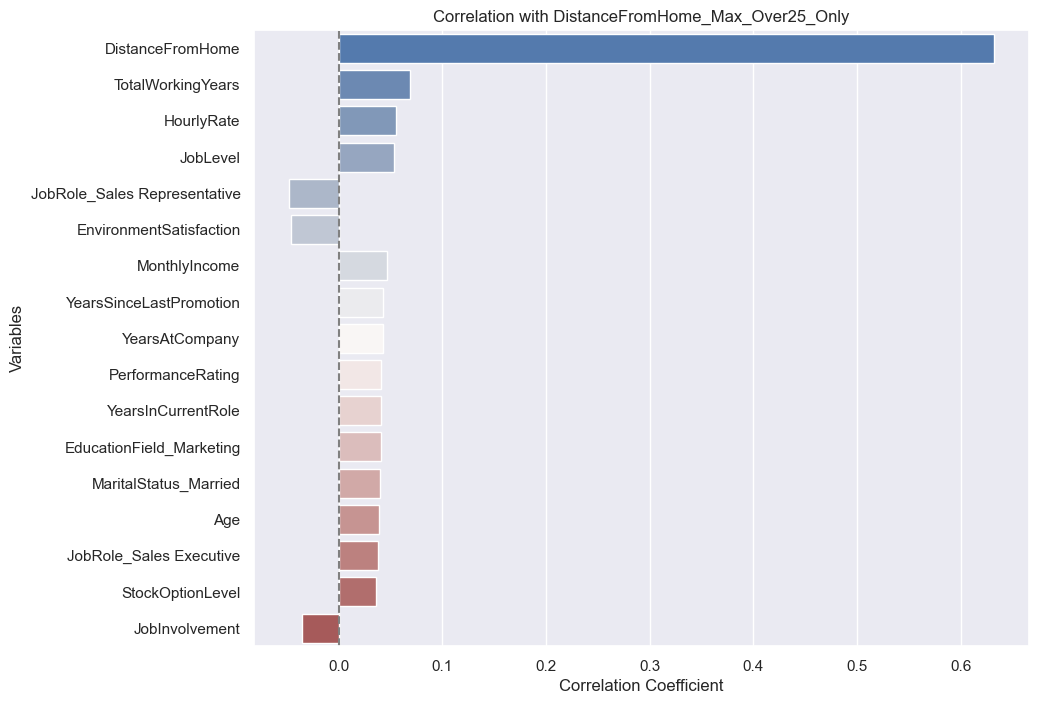

In [158]:
# Assuming `high_corr_vars` is your DataFrame from the previous output
plt.figure(figsize=(10, 8))
#create a bar plot, sorting values by 'Correlation' magnitude for visualization
sb.barplot(x='Correlation', y='Variable', data=high_corr_vars.sort_values(by='Correlation', key=abs, ascending=False), palette="vlag")

plt.title('Correlation with DistanceFromHome_Max_Over25_Only')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='grey', linestyle='--') 

plt.show()


Compare all of the columns of interest against DistanceFromHome_Max_Over25_Only

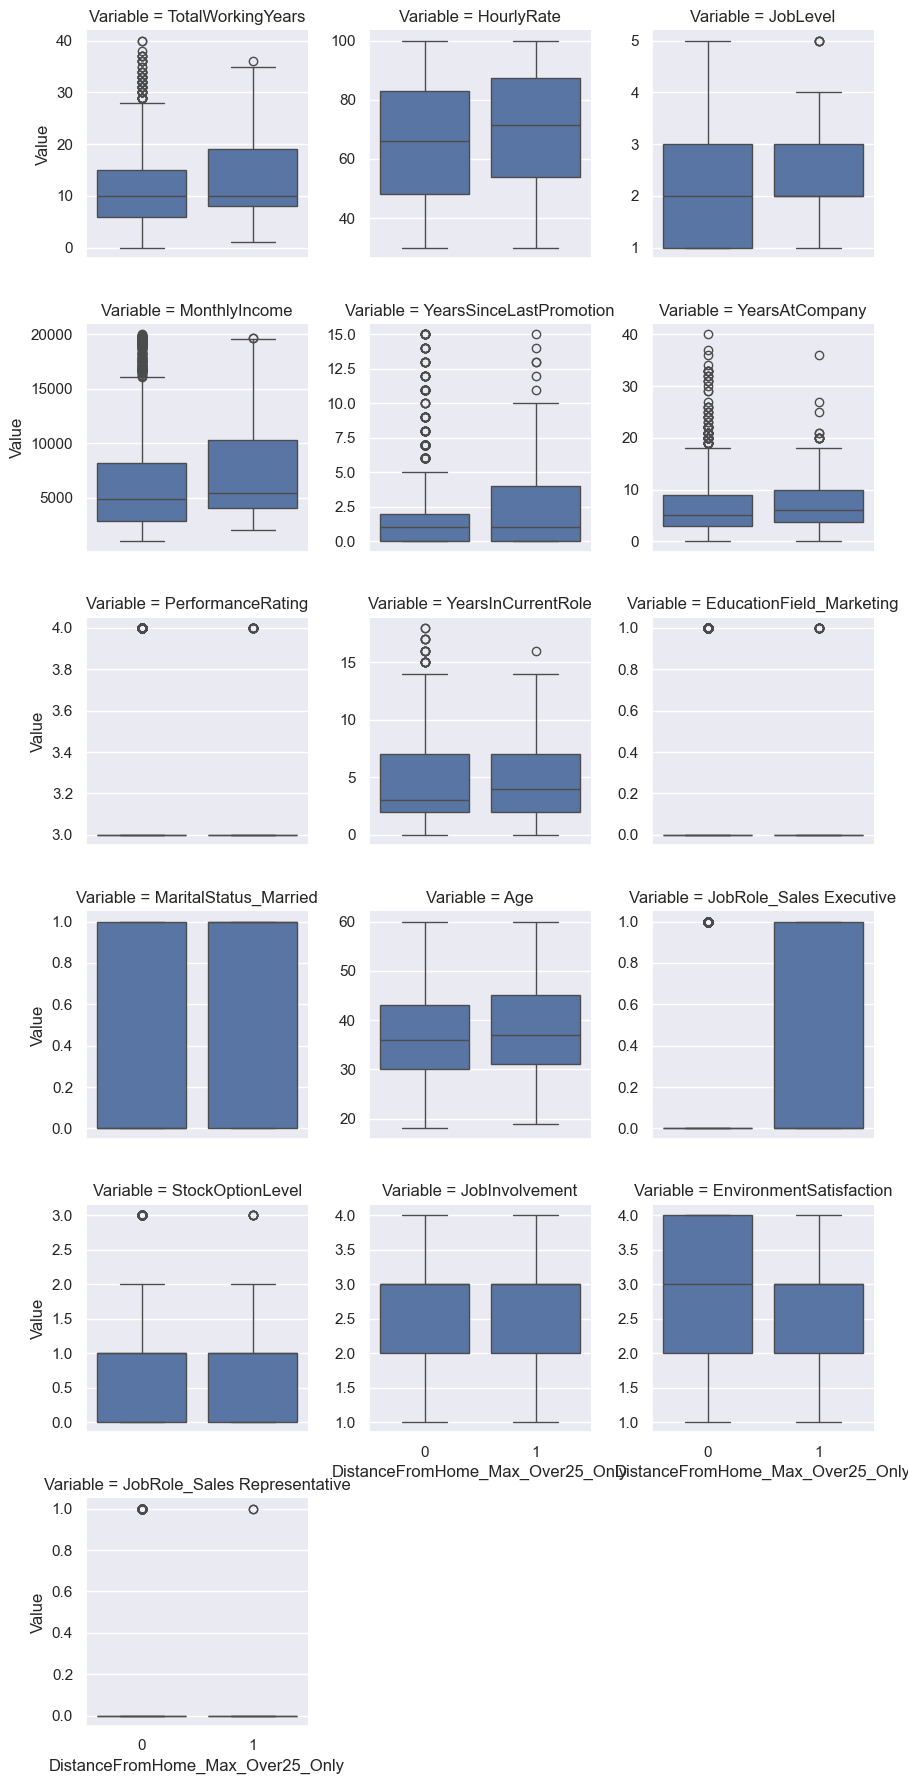

In [159]:
# List of variables you found interesting in your correlation analysis
variables_of_interest = ['TotalWorkingYears', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'YearsSinceLastPromotion', 
                         'YearsAtCompany', 'PerformanceRating', 'YearsInCurrentRole', 'EducationField_Marketing', 'MaritalStatus_Married',
                          'Age', 'JobRole_Sales Executive', 'StockOptionLevel','JobInvolvement', 'EnvironmentSatisfaction', 'JobRole_Sales Representative' ]

# Melt the DataFrame to long-format for easier plotting with seaborn
hr_long = hr_num.melt(id_vars='DistanceFromHome_Max_Over25_Only', value_vars=variables_of_interest, var_name='Variable', value_name='Value')

# Create a FacetGrid boxplot for each variable
g = sb.FacetGrid(hr_long, col='Variable', col_wrap=3, sharey=False)
g.map(sb.boxplot, 'DistanceFromHome_Max_Over25_Only', 'Value', order=[0, 1])

plt.show()


Box plots are a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Here's how to interpret the box plots:

Box Plot Components
- Median (Q2 / 50th Percentile): The line inside the box indicates the median of the data. This is the middle value when the data are sorted in ascending order.
- First Quartile (Q1 / 25th Percentile): The bottom edge of the box shows the first quartile. 25% of the data fall below this value.
- Third Quartile (Q3 / 75th Percentile): The top edge of the box shows the third quartile. 75% of the data fall below this value, and 25% are above.
- Interquartile Range (IQR): The height of the box shows the IQR, which is the distance between the first and third quartiles.
- Whiskers: The lines extending from the top and bottom of the box ("whiskers") typically show the range of the data, often to 1.5 * IQR above and below the box. Points beyond this range are often considered outliers and plotted as individual points.
- Outliers: Points that lie above or below the whiskers. They're considered unusual values in your data.

So these are all of the columns that may have a contributing factor.

EnvironmentSatisfaction is higher for those who do not live in the max range.                                     📝Explore EnvironmentSatisfaction and DistanceFromHome further?

## 2a. Take a look from an absolute numerical perspective.

#### Job roles of the people who have and have not quit in the max range.

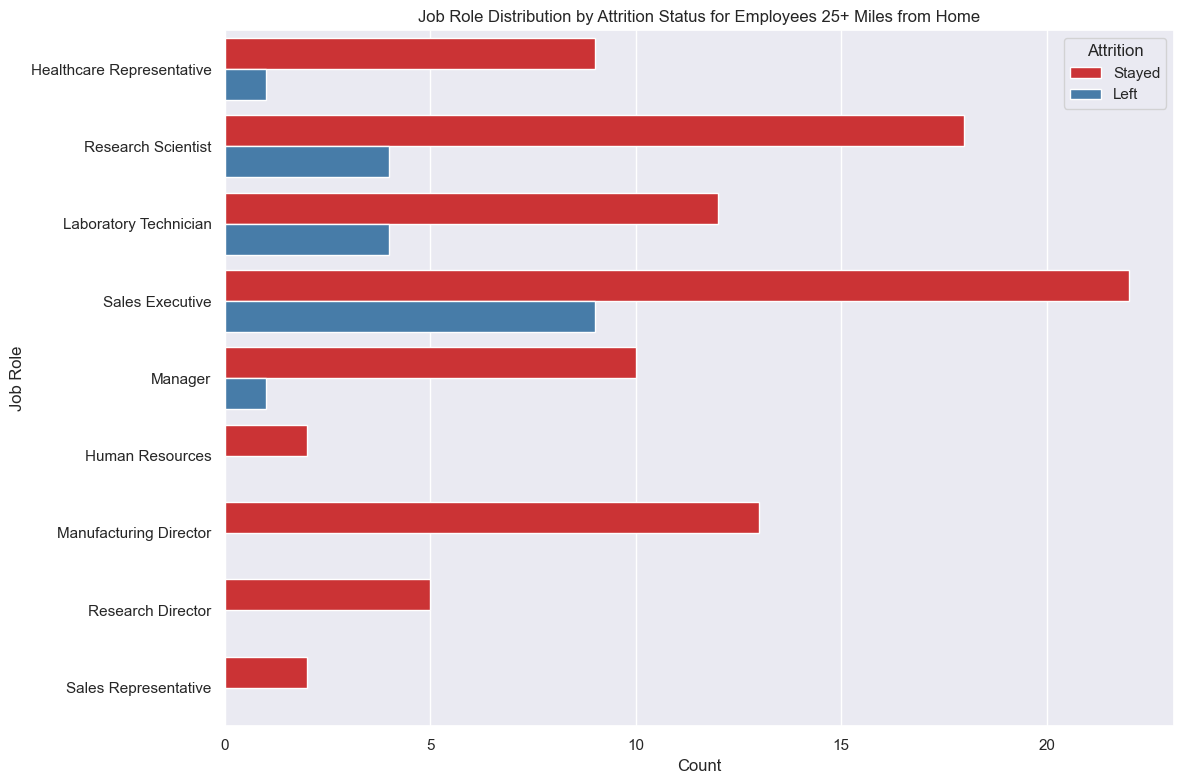

In [88]:
#filter the DataFrame for employees within the 25-max_distance range
hr_filtered = hr[(hr['DistanceFromHome'] >= 25) & (hr['DistanceFromHome'] <= max_distance)]

#visualization
plt.figure(figsize=(12, 8))
sb.countplot(y='JobRole', hue='Attrition', data=hr_filtered, palette='Set1')

plt.title('Job Role Distribution by Attrition Status for Employees 25+ Miles from Home')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()


#### Attrition rate per Job Role (absolute numerical)

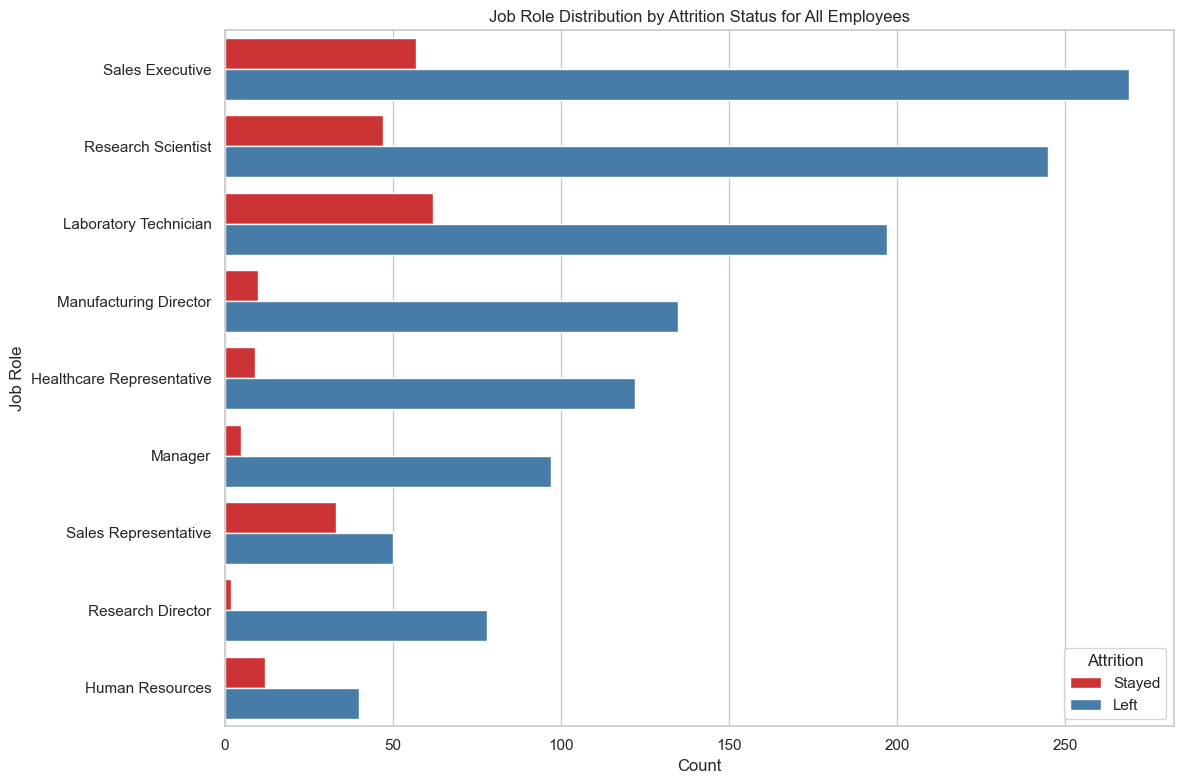

In [109]:
plt.figure(figsize=(12, 8))
sb.countplot(y='JobRole', hue='Attrition', data=hr, palette='Set1')

plt.title('Job Role Distribution by Attrition Status for All Employees')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

So we can see it is mostly Sales Executives who are more likely to leave anyway from a numbers perspective. We can explore more about this.

📝Explore Job Roles (Left) and Number of Years at Company, SalaryHike, Environment Satisfaction, etc.

## 1b. Let's look at it proportionally rather than using absolute numbers.

C:\Users\JB\AppData\Local\Temp\ipykernel_22808\1732648101.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')


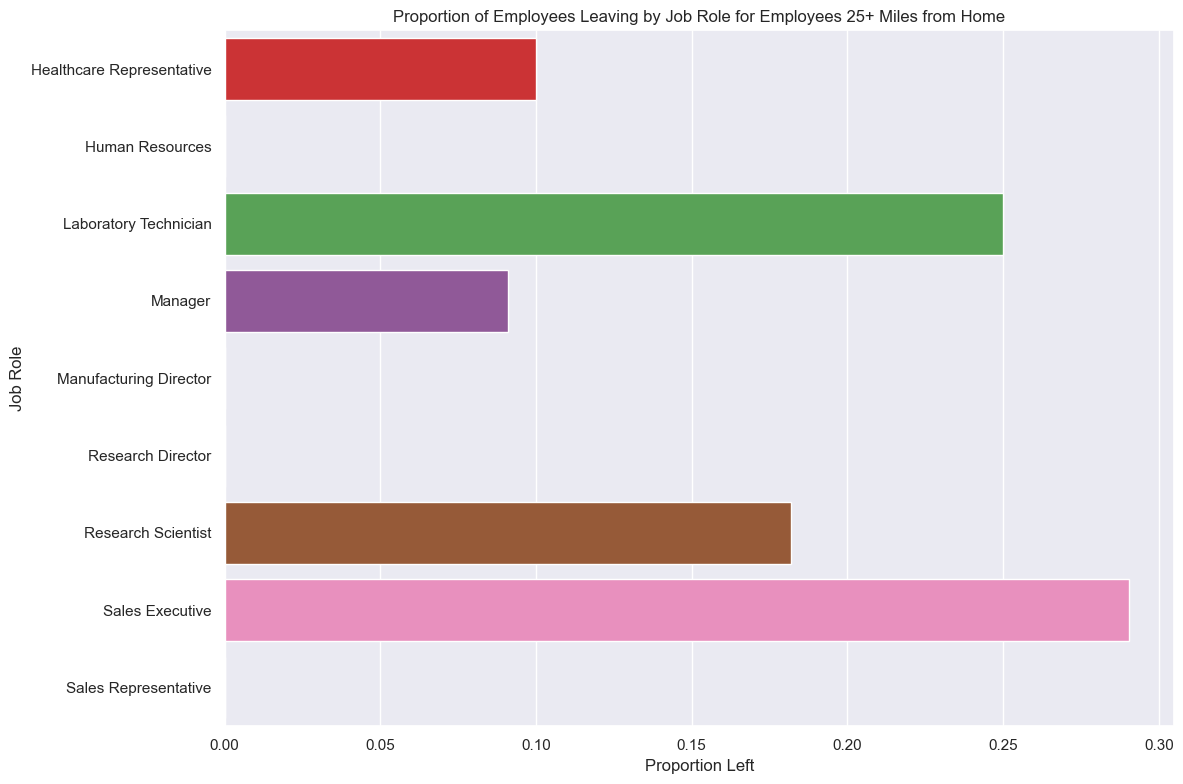

In [104]:
#filter the DataFrame for employees within the 25-max_distance range
hr_max_distance_filtered = hr_attrition_num[(hr_attrition_num['DistanceFromHome'] >= 25) & (hr_attrition_num['DistanceFromHome'] <= max_distance)]

#create a DataFrame to hold counts
job_role_attrition = hr_max_distance_filtered.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
#calculate proportions
#job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])
job_role_attrition['Proportion'] = job_role_attrition['Yes'] / (job_role_attrition['No'] + job_role_attrition['Yes'])

#reset index for plotting
job_role_proportions = job_role_attrition['Proportion'].reset_index()

#visualization
plt.figure(figsize=(12, 8))
sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')
#sb.barplot(y='hue', x='Proportion', data=job_role_proportions, palette='Set1', legend =False)

plt.title('Proportion of Employees Leaving by Job Role for Employees 25+ Miles from Home')
plt.xlabel('Proportion Left')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()


### Now compared to everyone, no matter the Distance from Home.

C:\Users\JB\AppData\Local\Temp\ipykernel_22808\2337945452.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')


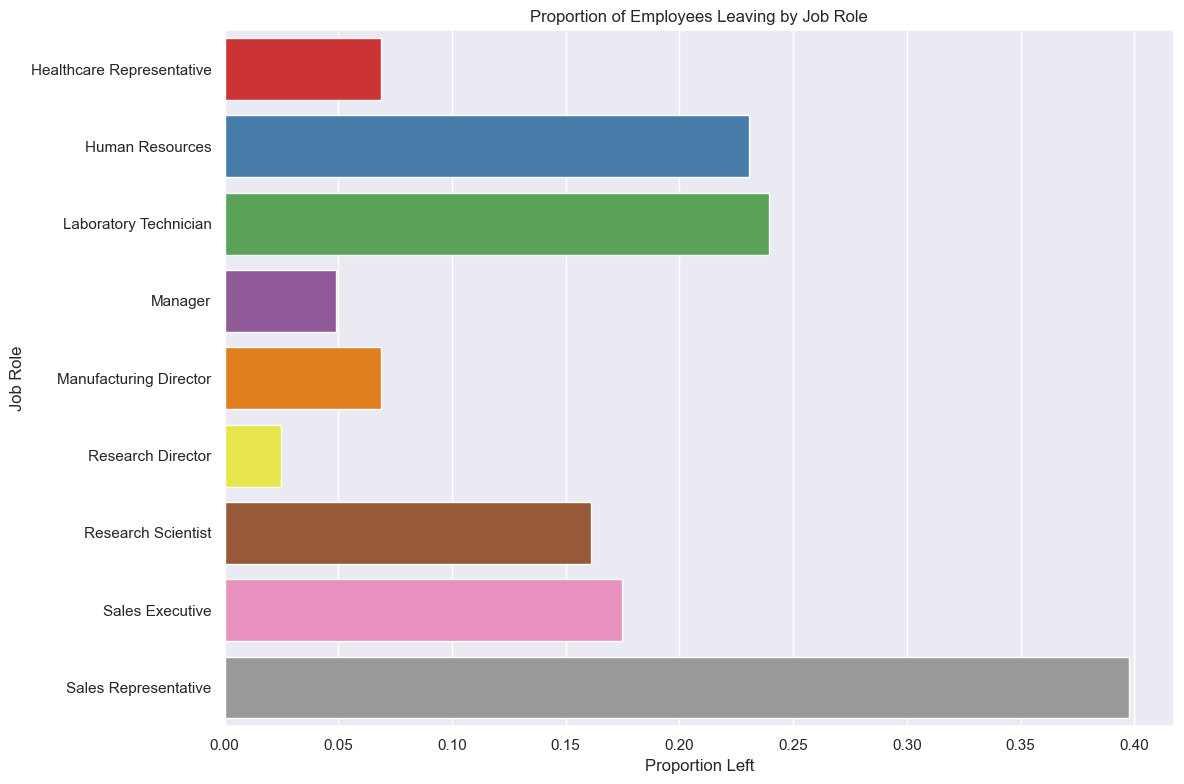

In [107]:
#create a DataFrame to hold counts
job_role_attrition = hr_attrition_num.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
#calculate proportions
#job_role_attrition['Proportion'] = job_role_attrition[1] / (job_role_attrition[0] + job_role_attrition[1])
job_role_attrition['Proportion'] = job_role_attrition['Yes'] / (job_role_attrition['No'] + job_role_attrition['Yes'])

#reset index for plotting
job_role_proportions = job_role_attrition['Proportion'].reset_index()

#visualization
plt.figure(figsize=(12, 8))
sb.barplot(y='JobRole', x='Proportion', data=job_role_proportions, palette='Set1')
#sb.barplot(y='hue', x='Proportion', data=job_role_proportions, palette='Set1', legend =False)

plt.title('Proportion of Employees Leaving by Job Role')
plt.xlabel('Proportion Left')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()

While Sales Representatives are most likely to leave, DistanceFromHome may have an influence on this. We can explore the data some more to see if there any other indicators.

As for Laboratory Technicians, data from both show that they are leaving at a high rate. This could simply indicate that the department does not have a good retention rate for internal reasons, or there are just external factors such a favorable job market. We will explore the Lab Tech position more before making any conclusions.

# 3. How do Salary, Raises, Promotions, etc. play a role?

In [67]:
hr["MonthlyIncome"].value_counts()

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

In [68]:
hr["PercentSalaryHike"].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

C:\Users\JB\AppData\Local\Temp\ipykernel_22808\1670902186.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_hike_by_bin = hr_num_filtered.groupby('IncomeBin')['PercentSalaryHike'].mean()


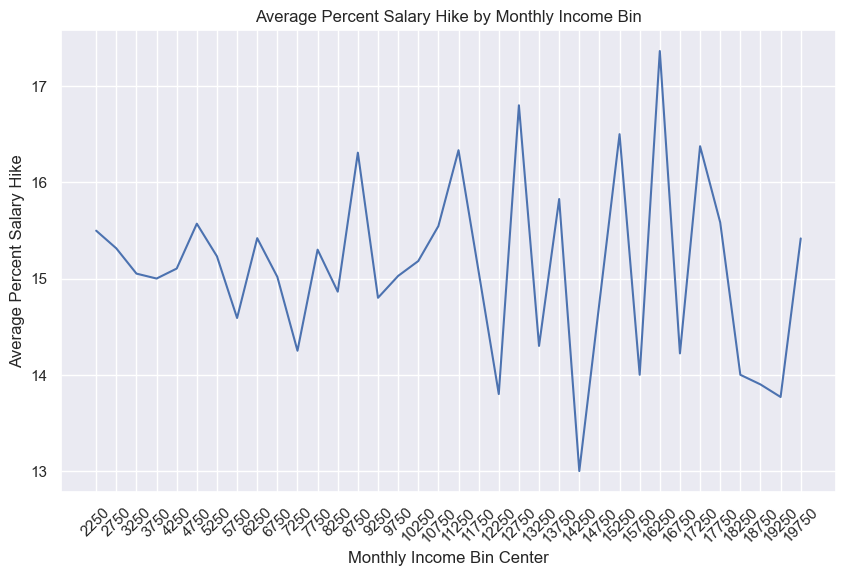

In [160]:
#create bins for Monthly Income
income_bins = np.arange(2000, hr['MonthlyIncome'].max() + 500, 500)
hr_num['IncomeBin'] = pd.cut(hr_num['MonthlyIncome'], bins=income_bins, include_lowest=True)

#filter data for Percent Salary Hike between 11 and 25
hr_num_filtered = hr_num[(hr_num['PercentSalaryHike'] >= 11) & (hr_num['PercentSalaryHike'] <= 25)]

#calculate the mean Percent Salary Hike for each income bin
bin_centers = 0.5 * (income_bins[:-1] + income_bins[1:])
mean_salary_hike_by_bin = hr_num_filtered.groupby('IncomeBin')['PercentSalaryHike'].mean()

plt.figure(figsize=(10, 6))
sb.lineplot(x=bin_centers, y=mean_salary_hike_by_bin.values)

plt.title('Average Percent Salary Hike by Monthly Income Bin')
plt.xlabel('Monthly Income Bin Center')
plt.ylabel('Average Percent Salary Hike')
plt.xticks(bin_centers, rotation=45)
plt.show()


📝I wonder how JobRole/Department plays a role on the above?

Comparing Years Since Last Promotion and Years with Current Manager to see if there is a correlation.

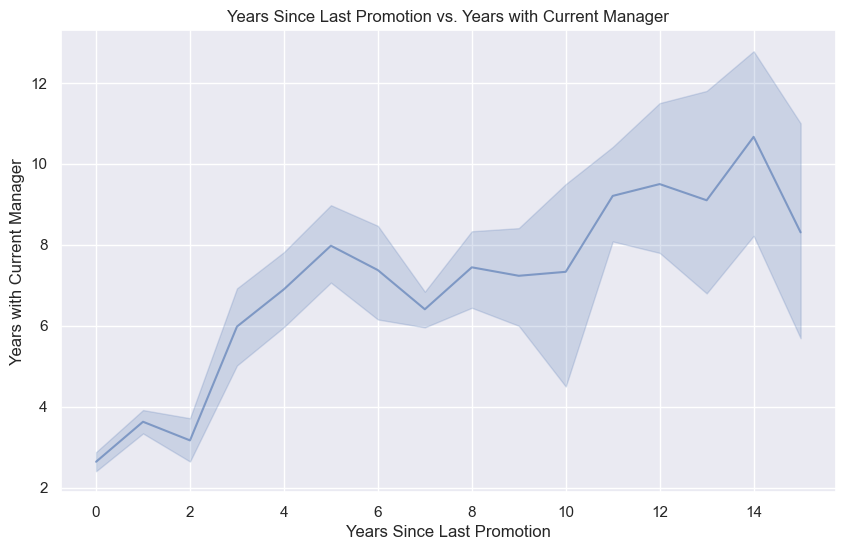

In [161]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sb.lineplot(x='YearsSinceLastPromotion', y='YearsWithCurrManager', data=hr, alpha=0.6)

plt.title('Years Since Last Promotion vs. Years with Current Manager')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Years with Current Manager')
plt.show()


Comparing Performance Rating and Years with Current Manager to see if there is a correlation.

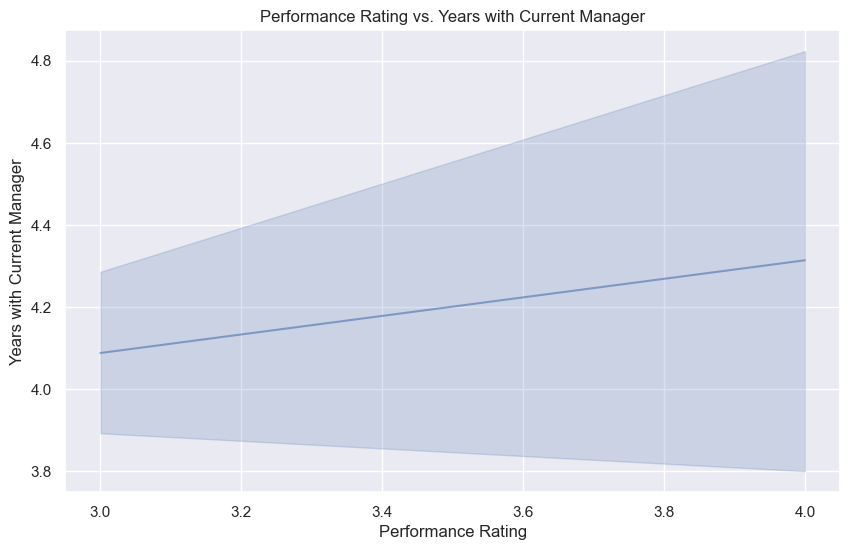

In [162]:
sb.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sb.lineplot(x='PerformanceRating', y='YearsWithCurrManager', data=hr, alpha=0.6)

plt.title('Performance Rating vs. Years with Current Manager')
plt.xlabel('Performance Rating')
plt.ylabel('Years with Current Manager')
plt.show()

# 4. Does Gender play a role?

Calculate the attrition rate per gender for each department

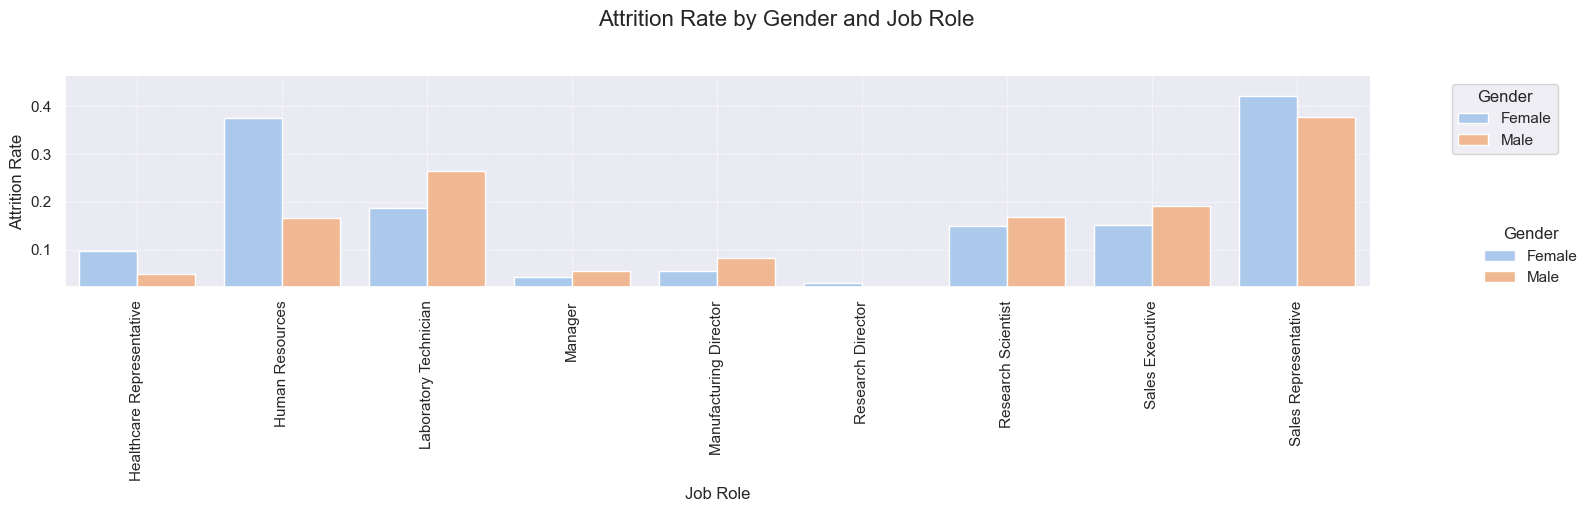

In [179]:
#This is necessary because seaborn does not calculate rates, you need to provide the specific values you want to plot
attrition_rate = hr_attrition_num.groupby(['JobRole', 'Gender'])['Attrition'].mean().reset_index()

#calculation for attrition rate by Job Role and Gender
g = sb.catplot(
    x='JobRole', 
    y='Attrition', 
    hue='Gender', 
    data=attrition_rate, 
    kind='bar',
    height=5, 
    aspect=3,  
    palette='pastel'
)

#improve the readability
plt.xticks(rotation=90)  # Rotate the labels for better readability

#set the y-axis to start from zero if attrition rate doesn't go below zero
plt.ylim(attrition_rate['Attrition'].min(), attrition_rate['Attrition'].max() * 1.1)  # Adjust the upper limit to 10% above the maximum attrition rate

#add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#set the labels and titles and improve formatting
g.set_xlabels('Job Role', fontsize=12)
g.set_ylabels('Attrition Rate', fontsize=12)
g.fig.suptitle('Attrition Rate by Gender and Job Role', y=1.02, fontsize=16)  #adjusts title and position

# adjust legend
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

⭐Female employees in the Human Resources Department quit overwhelming over the Male employees.

📝Why is this? Let's look at Environment Satisfaction and some other factors.

COrrelate: YearsSInceLastPromotion and YearsWithCurrentManager, and maybe performance rating, then attrition rate

Do numCompaniesWorked and attrition have a correlation?

Monthly income and percentsalaryhike, then later and job satisfiction.
SO what has a higher correlattion to job satisfaction? monthly income or distancefromhome?

compare employeenumber where manager with years since last promotion, jobsatisfaction, performace rating etc.